<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [3]:
df_bookings.shape

(134590, 12)

In [4]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [5]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [6]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [7]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [8]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [9]:
df_bookings.revenue_realized.min(),df_bookings.revenue_realized.max()

(np.int64(2600), np.int64(45220))

### Data Extraction and data exploration:

In [10]:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")


In [11]:
df_ab = pd.read_csv("fact_aggregated_bookings.csv")

In [12]:
df_ab.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [13]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [14]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [15]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [16]:
df_ab.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [17]:
df_ab.shape

(9200, 5)

In [18]:
df_ab.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [19]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [20]:
df_ab.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


#### Data Cleaning

In [21]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [22]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [23]:
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [24]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [25]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [26]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [27]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [28]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [29]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [30]:
std = df_bookings.revenue_realized.std()
std

np.float64(6927.791692242814)

In [31]:
higher_limit = std*3 + df_bookings.revenue_realized.mean()
higher_limit

np.float64(33479.358661845814)

In [32]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [33]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [34]:
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [35]:
9048*3 + 23439

50583

In [36]:
df_bookings.isnull().sum() # here ratings can be null as most of the customers didn't provide rating so its ok to have null values for ratings column

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [37]:
df_rooms.isnull().sum()

room_id       0
room_class    0
dtype: int64

In [38]:
df_hotels.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

In [39]:
df_ab.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [40]:
null_values = df_ab[df_ab['capacity'].isnull()]
null_values

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [41]:
median = df_ab.capacity.median()
median

np.float64(25.0)

In [42]:
df_ab = df_ab.fillna(median)

In [43]:
df_ab.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [44]:
df_ab.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [45]:
df_ab[df_ab['successful_bookings']> df_ab['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [46]:
df_ab['occ_per'] = round(df_ab['successful_bookings']/df_ab['capacity']*100,2)
df_ab.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_per
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


### Insights:

### 1. What is an average occupancy rate in each of the room categories?

In [47]:

avg_occu_rate = df_ab.groupby('room_category')['occ_per'].mean().round(2)
avg_occu_rate

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_per, dtype: float64

In [48]:
new = pd.merge(avg_occu_rate, df_rooms, left_on='room_category', right_on='room_id')
new.head()

,occ_per,room_id,room_class
0,58.23,RT1,Standard
1,58.04,RT2,Elite
2,58.03,RT3,Premium
3,59.30,RT4,Presidential


In [49]:
new.groupby('room_class')['occ_per'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_per, dtype: float64

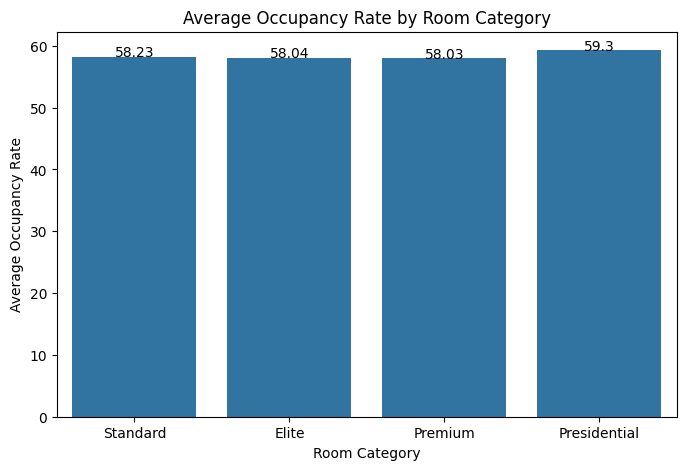

In [50]:
plt.figure(figsize=(8, 5), label=True)
sns.barplot(
    data=new,
    x='room_class',
    y='occ_per',
  
)

plt.title('Average Occupancy Rate by Room Category')
plt.xlabel('Room Category')
plt.ylabel('Average Occupancy Rate')
for index, row in new.iterrows():
    plt.text(
        index,
        row['occ_per'],
        f"{row['occ_per']}",
        ha='center'
    )

plt.show()

### 2. Print average occupancy percentage per city

In [51]:
avg_city = pd.merge(df_hotels, df_ab, on='property_id')
avg_city.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_per
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74
1,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT2,21,22.0,95.45
2,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT3,8,8.0,100.00
3,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT4,3,3.0,100.00
4,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16


In [52]:
avg_city.groupby('city')['occ_per'].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_per, dtype: float64

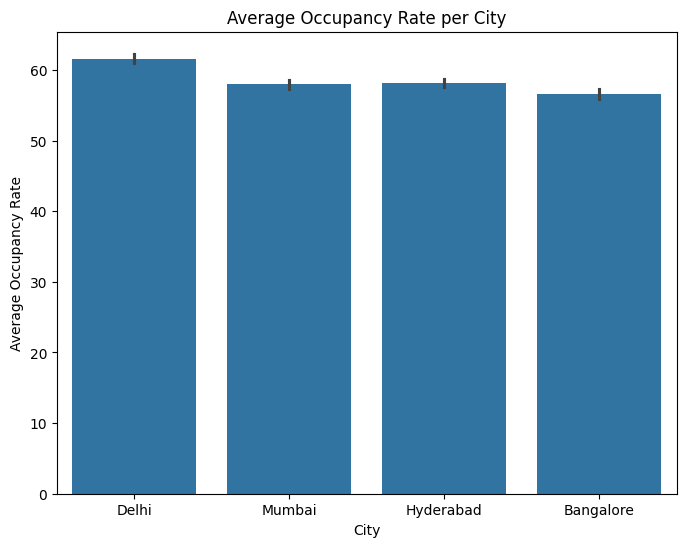

In [53]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=avg_city,
    x='city',
    y='occ_per'
)

plt.title('Average Occupancy Rate per City')
plt.xlabel('City')
plt.ylabel('Average Occupancy Rate')
plt.show()


### 3. When was the occupancy better? weekend or weekday?

In [54]:
occ_dtype=pd.merge(df_ab, df_date, left_on='check_in_date', right_on='date')
occ_dtype.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_per,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,10-May-22,May-22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,10-May-22,May-22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,10-May-22,May-22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,10-May-22,May-22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,10-May-22,May-22,W 20,weekeday


In [55]:
occ_dtype.groupby('day_type')['occ_per'].mean()

day_type
weekeday    50.903780
weekend     72.393432
Name: occ_per, dtype: float64

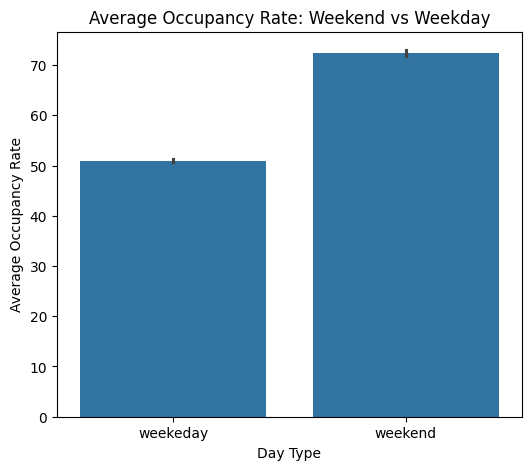

In [56]:
plt.figure(figsize=(6, 5))

sns.barplot(
    data=occ_dtype,
    x='day_type',
    y='occ_per'
)

plt.title('Average Occupancy Rate: Weekend vs Weekday')
plt.xlabel('Day Type')
plt.ylabel('Average Occupancy Rate')
plt.show()


### 4. Revenue realised per city?

In [57]:
Rev_city = pd.merge(df_bookings, df_hotels, on='property_id')
Rev_city.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [58]:
Rev_city.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

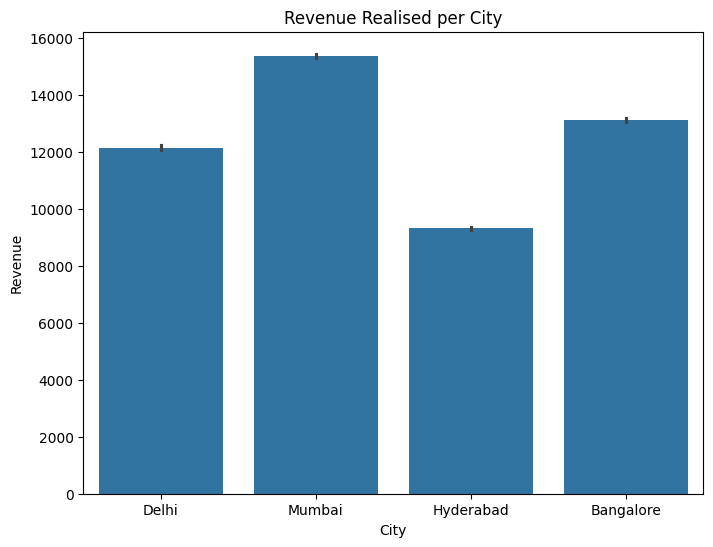

In [59]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=Rev_city,
    x='city',
    y='revenue_realized'
)

plt.title('Revenue Realised per City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.show()


### 5. Month by month revenue?

In [60]:
df_bookings['booking_date']= pd.to_datetime(df_bookings['booking_date'])

C:\Users\prasa\AppData\Local\Temp\ipykernel_23376\1822099606.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_bookings['booking_date']= pd.to_datetime(df_bookings['booking_date'])


In [61]:
df_date['date']= pd.to_datetime(df_date['date'])

C:\Users\prasa\AppData\Local\Temp\ipykernel_23376\2806928693.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date']= pd.to_datetime(df_date['date'])


In [62]:
mom_rev = pd.merge(df_bookings, df_date, left_on='booking_date', right_on='date')
mom_rev.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May012216558RT21,16558,2022-07-04,1/5/2022,6/5/2022,2.0,RT2,others,NaN,Checked Out,12600,12600,2022-07-04,Jul-22,W 28,weekeday
1,May012216559RT320,16559,2022-07-04,1/5/2022,2/5/2022,3.0,RT3,others,NaN,Cancelled,22440,8976,2022-07-04,Jul-22,W 28,weekeday
2,May012216560RT22,16560,2022-07-04,1/5/2022,2/5/2022,2.0,RT2,others,3.0,Checked Out,12600,12600,2022-07-04,Jul-22,W 28,weekeday
3,May012216560RT43,16560,2022-07-04,1/5/2022,2/5/2022,2.0,RT4,others,NaN,Cancelled,26600,10640,2022-07-04,Jul-22,W 28,weekeday
4,May012216561RT11,16561,2022-07-04,1/5/2022,3/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100,2022-07-04,Jul-22,W 28,weekeday


In [63]:
mom_rev.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul-22    326160921
Jun-22    390123323
May-22    398286993
Name: revenue_realized, dtype: int64

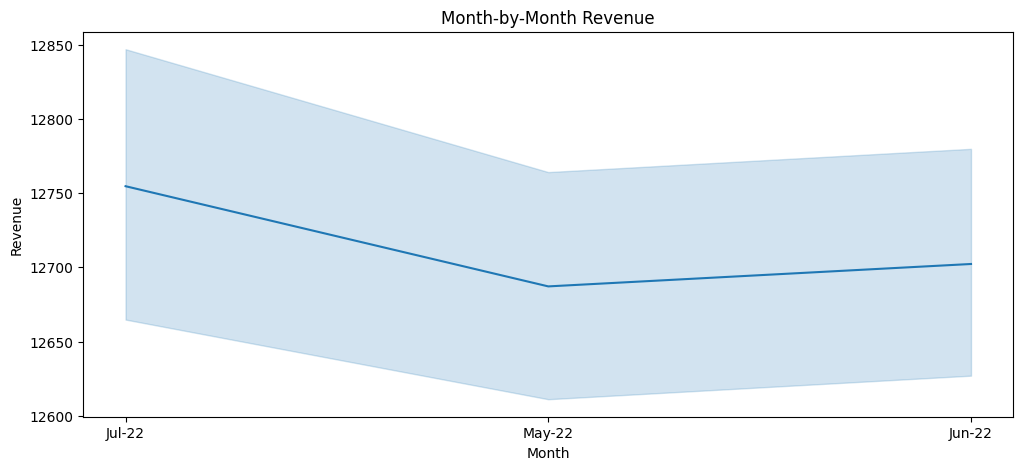

In [64]:
plt.figure(figsize=(12, 5))

sns.lineplot(
    data=mom_rev,
    x='mmm yy',
    y='revenue_realized'
)

plt.title('Month-by-Month Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


### 6. revenue realized per hotel type?

In [65]:
rev_hotel_type = pd.merge(df_bookings, df_hotels, on='property_id')
rev_hotel_type.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,2022-04-30,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,2022-04-27,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,2022-01-05,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,2022-04-28,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,2022-04-26,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [66]:
rev_hotel_type.groupby('property_name')['revenue_realized'].sum()

property_name
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Exotica    320258588
Atliq Grands     211462134
Atliq Palace     304081863
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(
     data=rev_hotel_type,
    x='property_name',
    y='revenue_realized',
)
plt.title('Revenue Realized per Hotel Type')
plt.axis('equal')  
plt.show()


### 7. average rating per city?

In [67]:
avg_rating_per_city = rev_hotel_type.groupby('city')['ratings_given'].mean().round(2)
avg_rating_per_city

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

### 8. revenue realized per booking platform(Pie chart)?

In [68]:
revenue_by_booking_platform = rev_hotel_type.groupby('booking_platform')['revenue_realized'].sum()
revenue_by_booking_platform

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

In [ ]:
plt.figure(figsize=(8, 6))

plt.pie(
    rev_hotel_type['revenue_realized'],
    labels=rev_hotel_type['booking_platform']
)

plt.title('Revenue Realized per Booking Platform')
plt.axis('equal')
plt.show()
